# Credit Card Fraud Detection

# Dataset

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise. 

In [ ]:
#Handle imbalanced dataset
1. Under-Sampling method
2. Over-Sampling method
3. Smike : under-sampling the positive and over-sampling the negatives
    
    
#Model 
1. Logistic Regression
2. Random Forest
3. Knn
4. decision tree


#Parameter
1. ROC, AUC
2. Precision, recall, f1 score

In [ ]:
1. Scaling 
2. Split data train test set

To the train dataset:
3. USE SMOTE
heatmap

t-sne to heatmap

boxplot to determine positive and negative correlation
remove outliers to the one hat have a high correlation with the class
calculate iqr



4. Remove extreme outliers from train dataset

5. Implement the model
determine which one fit the best using ROC AUC

6. Experiment with under and over sampling, which one is the best


# Analyze the Data

In [8]:
#Import the relevant modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [9]:
#Import the data
df = pd.read_csv('creditcard.csv')

#See the shape of the data
df.shape

(284807, 31)

In [10]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [12]:
df['Class'].value_counts()/df.shape[0]*100 

0    99.827251
1     0.172749
Name: Class, dtype: float64

In [13]:
print('Non-Fraud Transaction is',round(df['Class'].value_counts()[0]/len(df)*100,2),'% of the dataset')
print('Fraud Transaction is',round(df['Class'].value_counts()[1]/len(df)*100,2),'% of the dataset')

Non-Fraud Transaction is 99.83 % of the dataset
Fraud Transaction is 0.17 % of the dataset


Text(0.5, 1.0, 'Class Distribution')

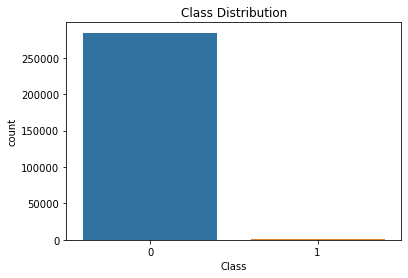

In [14]:
#Plotting the difference betweeen fraud and non-fraud transactions
sns.countplot(df['Class'])
plt.title('Class Distribution')

**Distribution of the Transaction Amount and Time**

Text(0.5, 1.0, 'Distribution of Time')

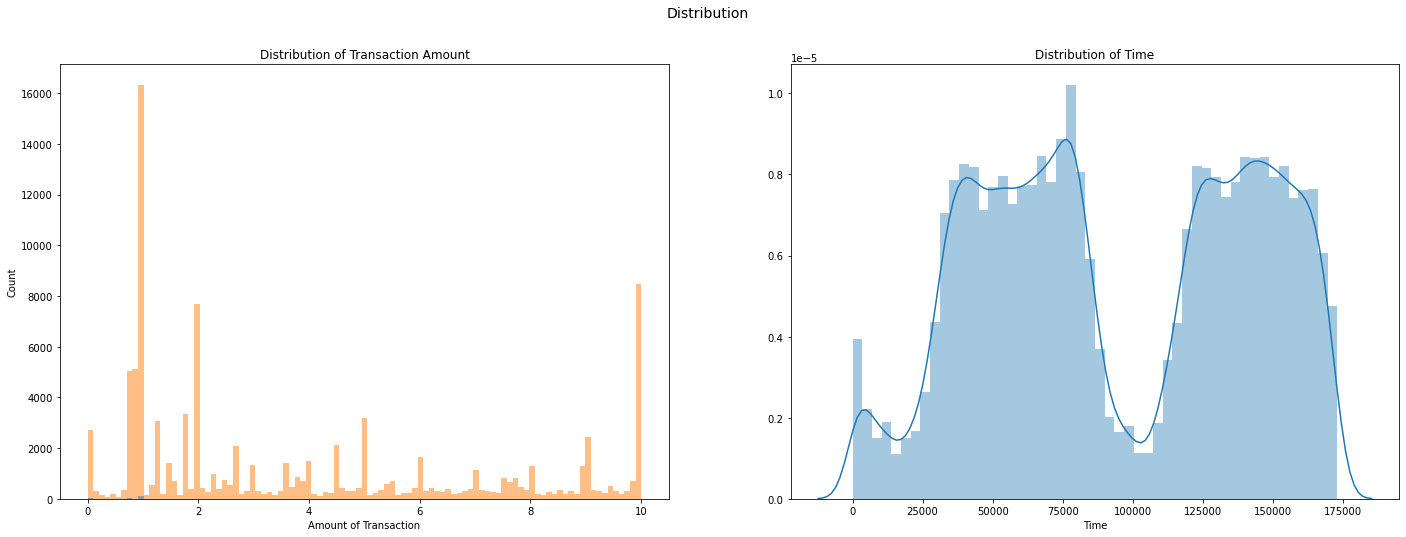

In [18]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,8))

# labels = ['No Fraud', 'Fraud']
f.suptitle('Distribution', fontsize=14)


#Distribution of Transaction Amount

bins = np.linspace(0, 10, 100)

data_nf = df[df['Class']==0]
data_f = df[df['Class']==1]

ax1.hist(data_nf['Amount'],bins=bins, label='Non-Fraud',alpha=0.5,color='tab:orange')
ax1.hist(data_f['Amount'],bins=bins,label='Fraud', alpha=0.5, color='tab:blue')

ax1.set_xlabel('Amount of Transaction')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of Transaction Amount')


#Distribution of Time
ax2=sns.distplot(df['Time'])
ax2.set_title('Distribution of Time')


**Note:** Notice that we have an imbalanced dataset where most of the transactions is non-fraud. If we use it as it is we can get a lot of error or an overfitting since it's more biased for the non-fraud transaction. So we have to handle it first. For this project, I will do :
1. Under-Sampling method
2. Over-Sampling method
3. Smote (over-sampling the negatives and under-sampling the positive)

**Data Analysis**

In this section, we will look at missing value and categorize the columns but since we don't know what columns it is besides the 'Time', 'Amount', and 'Class', we will only look at the missing value.

In [19]:
df.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

It seems like we don't have any missing value, so we don't have to do anyting here.

# Scaling

Because the **Amount** and the **Time** value is bigger than the other value in each columns, we have to scale it so we can apply the machine learning algorithm correctly.

In [20]:
dataset = df.copy()

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaling = scaler.fit_transform(np.array(dataset['Amount']).reshape(-1, 1))
scaling2 = scaler.fit_transform(np.array(dataset['Time']).reshape(-1, 1))

In [22]:
dataset['Amount']=scaling
dataset['Time']=scaling2

# See The Correlation

We have an imbalanced dataset so we can't see the correlation really well, so we have to handle it first. I will use SMOTE to handle the imbalanced dataset. Note that I'm doing this only to see the correlation between each feature.

In [24]:
#Determine the X and y
X = dataset.drop('Class', axis=1)
y = dataset['Class']

from collections import Counter
from imblearn.combine import SMOTETomek

#Implementing the technique
smk = SMOTETomek(random_state=42)

# fit and apply the transform
X_smk, y_smk = smk.fit_resample(X, y)

# summarize class distribution
print(Counter(y))
print(Counter(y_smk))

Counter({0: 284315, 1: 492})
Counter({0: 284315, 1: 284315})


In [25]:
#Make a train set dataframe for SMOTE
df_smote = X_smk
df_smote['Class']=y_smk

#Reset the index
df_smote['index']=[i for i in range(len(df_smote))]
df_smote = df_smote.set_index('index')

X_smk = X_smk.drop(['index','Class'],axis=1)

Text(0.5, 1.0, 'Class Distribution')

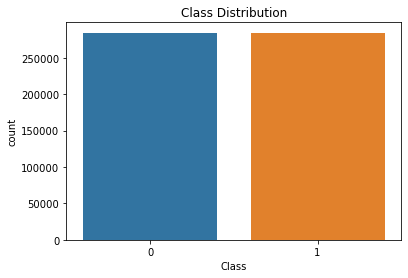

In [26]:
#Plotting the difference betweeen fraud and non-fraud transactions
sns.countplot(df_smote['Class'])
plt.title('Class Distribution')

Text(0.5, 1.0, 'After SMOTE')

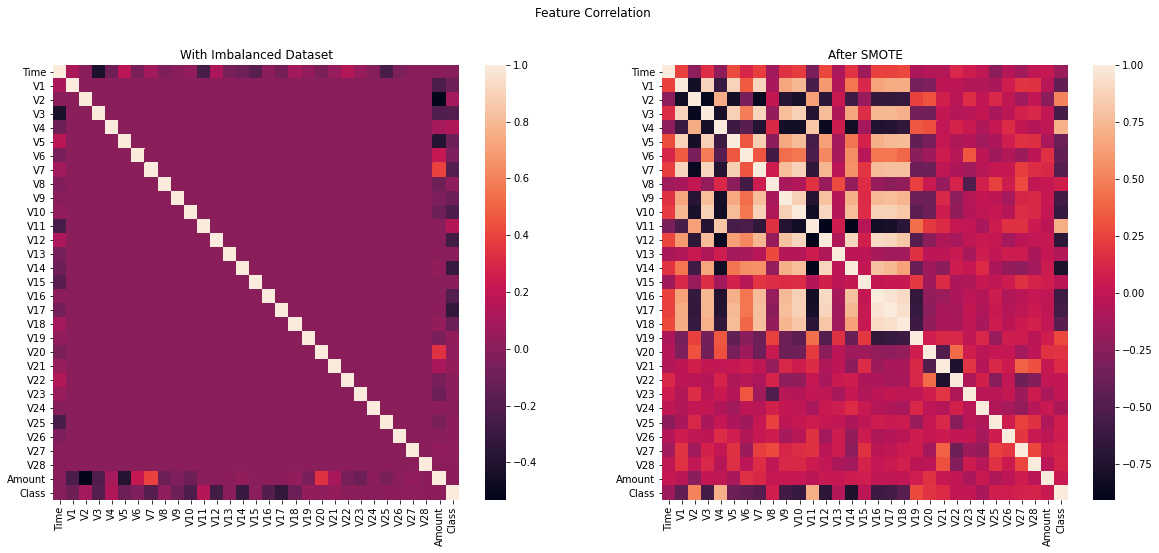

In [27]:
#Plot a heatmap
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,8))
fig.suptitle('Feature Correlation')

#Imbalanced Dataset
sns.heatmap(dataset.corr(),ax=axes[0])
axes[0].set_title('With Imbalanced Dataset')

#Data after SMOTE
sns.heatmap(df_smote.corr(),ax=axes[1])
axes[1].set_title('After SMOTE')

**See if feature have a positive or negative correlation**

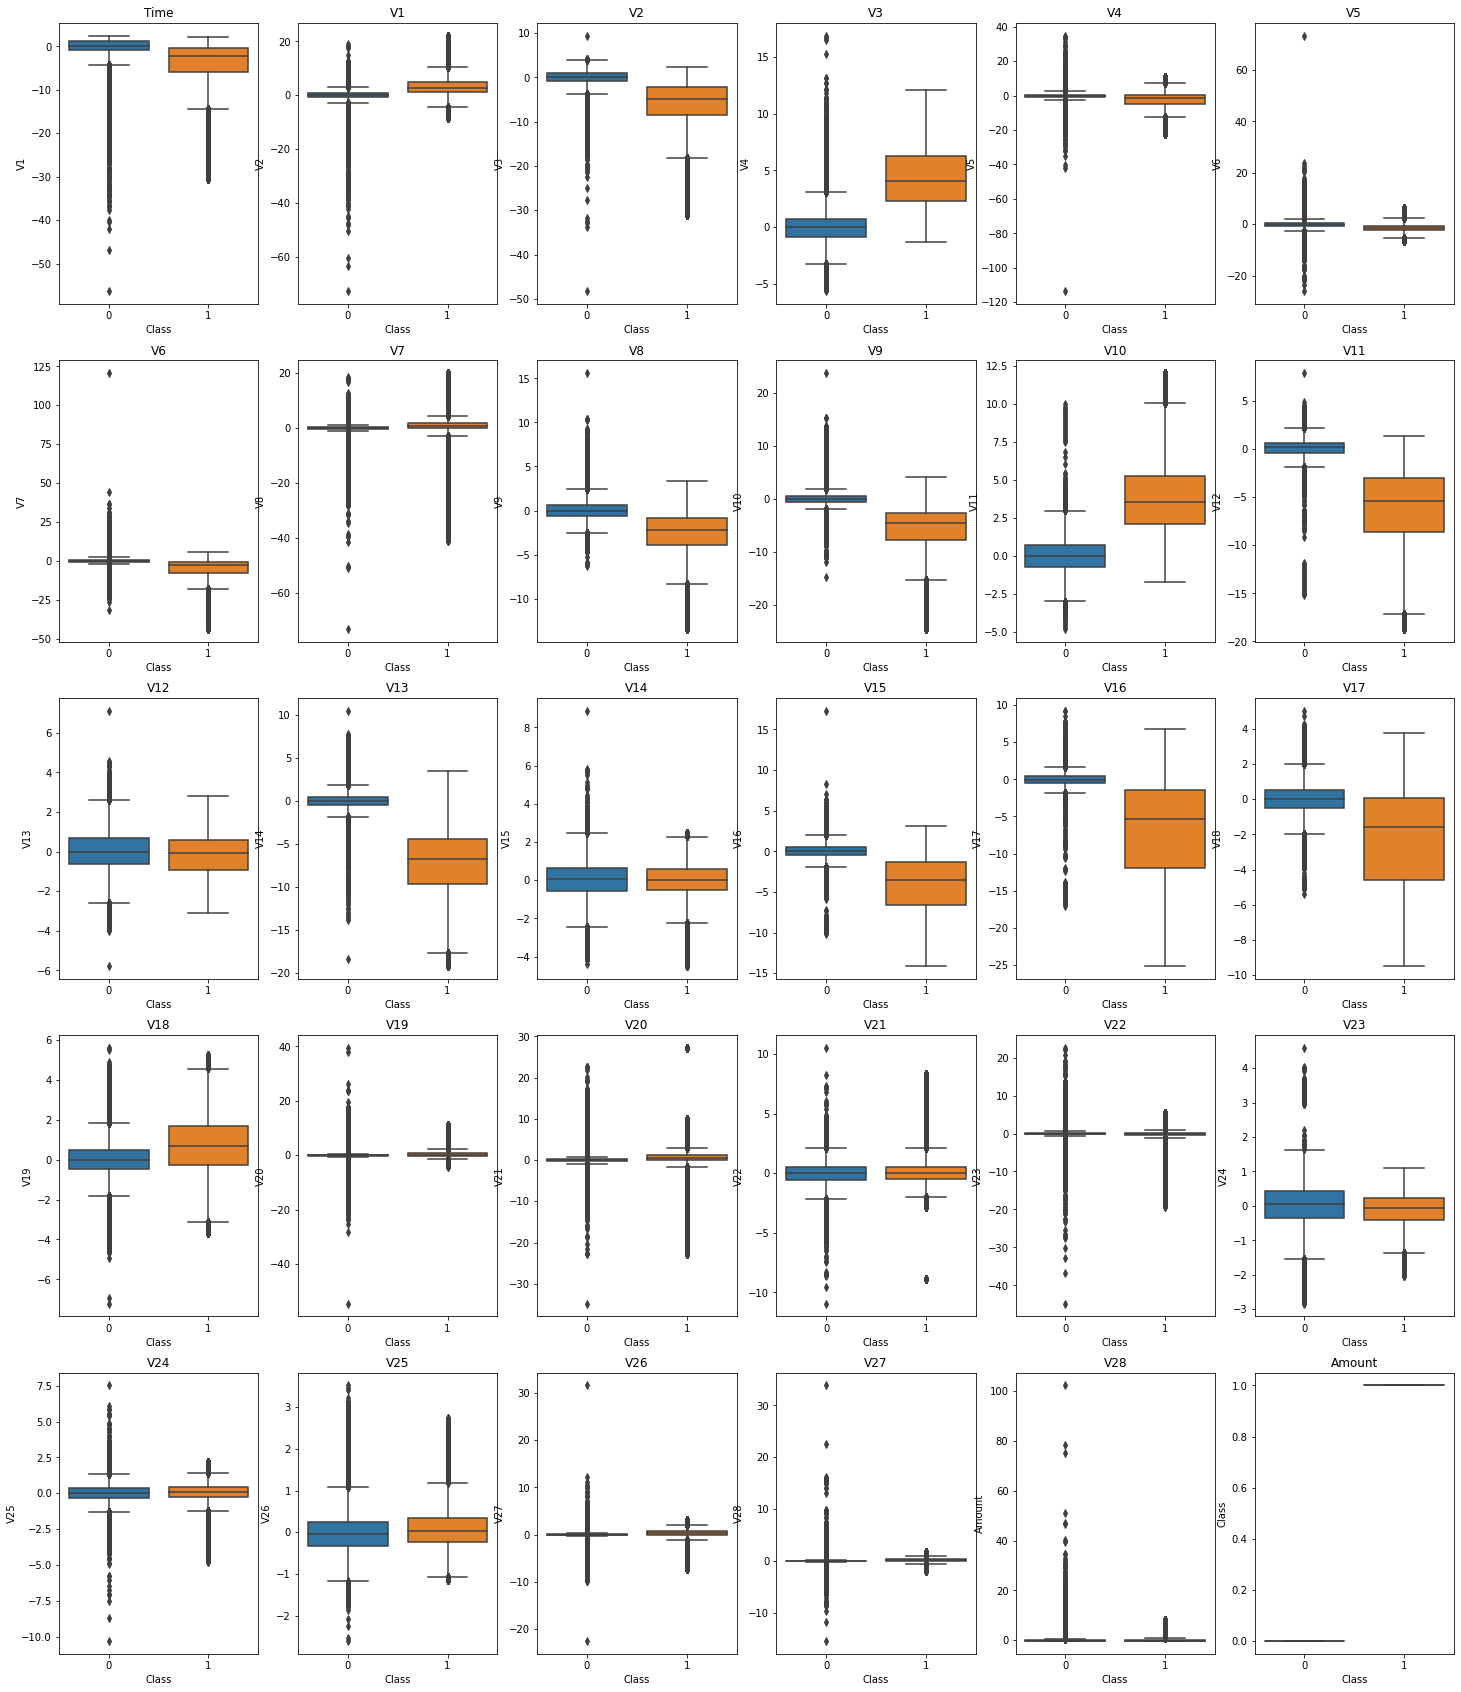

In [28]:
col = [i for i in df_smote.columns if i!='Class']

n_rows = 5
n_cols = 6
count = 0
col_num = 1

plt.subplots(n_rows, n_cols, figsize=(25,30))

for i in range(n_rows):
    for j in range(n_cols):
        plt.subplot(n_rows, n_cols, count+1)
        sns.boxplot(y=df_smote.iloc[:, col_num],x=df_smote["Class"])
        plt.title(col[col_num-1])
        if col_num < df.shape[1] :
            count += 1
            col_num += 1

plt.show()


From the boxplot, we can see that:

**Negative Correlation:** Time V2 V6 V8 V9 V11 V13 V15 V16 V17
    
**Positive Correlation:** V1 V3 V10 V18

And we can see that feature that have a high correlation with the class is V2 V3 V8 V10 V11 V13 V15 V16 V17 V18 so we will remove outliers from this dataset

In [29]:
out = ['V2', 'V3', 'V8', 'V10', 'V11', 'V13', 'V15', 'V16', 'V17', 'V18']

new_df = df_smote.copy()

for i in out:
    fraud = new_df[i].loc[new_df['Class'] == 1].values
    q25, q75 = np.percentile(fraud, 25), np.percentile(fraud, 75)

    iqr = q75 - q25

    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off

    outliers = [x for x in fraud if x < lower or x > upper]

    #Drop outliers from dataset
    new_df = new_df.drop(new_df[(new_df[i] > upper) | (new_df[i] < lower)].index)

Text(0.5, 1.0, 'After')

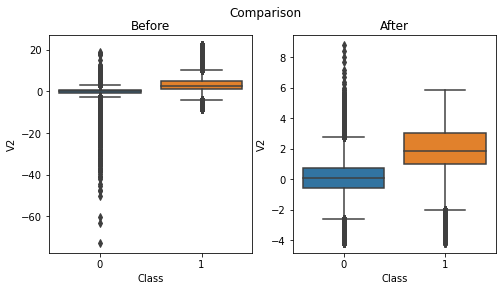

In [30]:
#Compare dataset
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(8,4))
fig.suptitle('Comparison')

sns.boxplot(x="Class", y='V2', data=df_smote,ax=axes[0])
axes[0].set_title('Before')

sns.boxplot(x="Class", y='V2', data=new_df,ax=axes[1])
axes[1].set_title('After')

Text(0.5, 1.0, 'After')

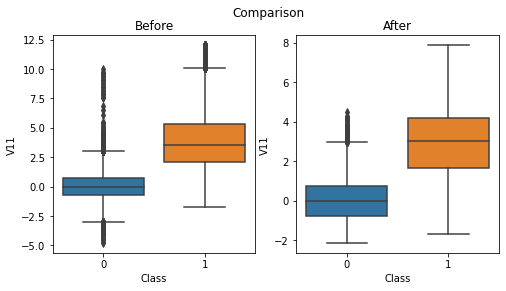

In [31]:
#Compare dataset
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(8,4))
fig.suptitle('Comparison')

sns.boxplot(x="Class", y='V11', data=df_smote,ax=axes[0])
axes[0].set_title('Before')

sns.boxplot(x="Class", y='V11', data=new_df,ax=axes[1])
axes[1].set_title('After')

Text(0.5, 1.0, 'Class Distribution')

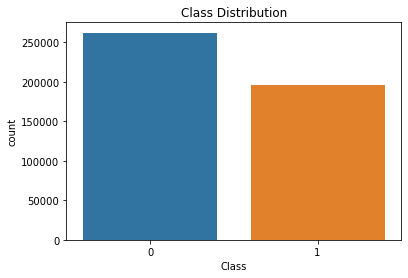

In [32]:
#Plotting the difference betweeen fraud and non-fraud transactions
sns.countplot(new_df['Class'])
plt.title('Class Distribution')

After removing the extreme outlier, we can see that most of the outliers is from the Fraud dataset

In [33]:
print('**Before Removing Outliers**')
print('Non-Fraud Transaction:',df_smote['Class'].value_counts()[0])
print('Fraud Transaction:',df_smote['Class'].value_counts()[1])
print(' ')
print('**After Removing Outliers**')
print('Non-Fraud Transaction:',new_df['Class'].value_counts()[0])
print('Fraud Transaction:',new_df['Class'].value_counts()[1])
print(' ')
print('**Reduce Number**')
print('Non-Fraud Transaction:',df_smote['Class'].value_counts()[0]-new_df['Class'].value_counts()[0])
print('Fraud Transaction:',df_smote['Class'].value_counts()[1]-new_df['Class'].value_counts()[1])

**Before Removing Outliers**
Non-Fraud Transaction: 284315
Fraud Transaction: 284315
 
**After Removing Outliers**
Non-Fraud Transaction: 262219
Fraud Transaction: 196315
 
**Reduce Number**
Non-Fraud Transaction: 22096
Fraud Transaction: 88000


# Split The Dataset

In [70]:
from sklearn.model_selection import train_test_split
X = new_df.drop('Class', axis=1)
y = new_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state = 42)

In [71]:
#Make a train set dataframe for SMOTE
train_set = X_train
train_set['Class']=y_train

#Reset the index
train_set['index']=[i for i in range(len(train_set))]
train_set = train_set.set_index('index')

X_train = X_train.drop(['index','Class'],axis=1)

<ipython-input-71-c13f7a793267>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['Class']=y_train
<ipython-input-71-c13f7a793267>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['index']=[i for i in range(len(train_set))]


# Implement Model

In this project I will use these model and compare it to find which one fits the best for this dataset :
    1. Logistic Regression
    2. K-Nearest Neighbor
    3. Support Vector Machine
    4. Decision Tree

In [72]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [75]:
#import library needed
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

classifiers = {
    "LogisiticRegression": LogisticRegression()
}

In [74]:
#Implement the model into the train dataset
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.metrics import average_precision_score

for key, classifier in classifiers.items():
    #Fit the data into the model
    classifier.fit(X_train, y_train)
    
    #Test the model to the test dataset and calculate the average precision-recall score
    y_score = classifier.predict(X_test)
    average_precision = average_precision_score(y_test, y_score)
    print(key,'Average precision-recall score: {0:0.2f}'.format(average_precision))
    
    #Print out the classification report
    classification_report(y_test, y_score)
    print(key,'Classification_report')
    print(classification_report(y_test, y_score))
    
    #Print out the cross validation score
    training_score = cross_val_score(classifier, X_test, y_test, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")
    
    acc_score = accuracy_score(y_test, y_score)
    print(key,'Accuracy Score',acc_score)
    


LogisiticRegression Average precision-recall score: 0.91
LogisiticRegression Classification_report
              precision    recall  f1-score   support

           0       0.93      0.97      0.95    209706
           1       0.96      0.90      0.93    157122

    accuracy                           0.94    366828
   macro avg       0.95      0.94      0.94    366828
weighted avg       0.94      0.94      0.94    366828

Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
LogisiticRegression Accuracy Score 0.942057312964114


**Dataset SMOTE but not drop outliers** 

In [76]:
#Split dataset
X = df_smote.drop('Class', axis=1)
y = df_smote['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state = 42)

# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [78]:
classifiers = {
    "LogisiticRegression": LogisticRegression()
}

In [77]:
#Implement the model into the train dataset
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.metrics import average_precision_score

for key, classifier in classifiers.items():
    #Fit the data into the model
    classifier.fit(X_train, y_train)
    
    #Test the model to the test dataset and calculate the average precision-recall score
    y_score = classifier.predict(X_test)
    average_precision = average_precision_score(y_test, y_score)
    print(key,'Average precision-recall score: {0:0.2f}'.format(average_precision))
    
    #Print out the classification report
    classification_report(y_test, y_score)
    print(key,'Classification_report')
    print(classification_report(y_test, y_score))
    
    #Print out the cross validation score
    training_score = cross_val_score(classifier, X_test, y_test, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")
    
    acc_score = accuracy_score(y_test, y_score)
    print(key,'Accuracy Score',acc_score)

    

LogisiticRegression Average precision-recall score: 0.94
LogisiticRegression Classification_report
              precision    recall  f1-score   support

           0       0.92      0.98      0.95    227365
           1       0.97      0.92      0.95    227539

    accuracy                           0.95    454904
   macro avg       0.95      0.95      0.95    454904
weighted avg       0.95      0.95      0.95    454904

Classifiers:  LogisticRegression Has a training score of 95.0 % accuracy score
LogisiticRegression Accuracy Score 0.9480615690343457


**Dataset haven't SMOTE**

In [79]:
#Split dataset
X = dataset.drop('Class', axis=1)
y = dataset['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state = 42)

# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [80]:
classifiers = {
    "LogisiticRegression": LogisticRegression()
}

In [81]:
#Implement the model into the train dataset
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.metrics import average_precision_score

for key, classifier in classifiers.items():
    #Fit the data into the model
    classifier.fit(X_train, y_train)
    
    #Test the model to the test dataset and calculate the average precision-recall score
    y_score = classifier.predict(X_test)
    average_precision = average_precision_score(y_test, y_score)
    print(key,'Average precision-recall score: {0:0.2f}'.format(average_precision))
    
    #Print out the classification report
    classification_report(y_test, y_score)
    print(key,'Classification_report')
    print(classification_report(y_test, y_score))
    
    #Print out the cross validation score
    training_score = cross_val_score(classifier, X_test, y_test, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")
    
    acc_score = accuracy_score(y_test, y_score)
    print(key,'Accuracy Score',acc_score)

    

LogisiticRegression Average precision-recall score: 0.50
LogisiticRegression Classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227459
           1       0.87      0.57      0.69       387

    accuracy                           1.00    227846
   macro avg       0.93      0.79      0.85    227846
weighted avg       1.00      1.00      1.00    227846

Classifiers:  LogisticRegression Has a training score of 100.0 % accuracy score
LogisiticRegression Accuracy Score 0.9991266030564504


**Dataset Under-Sampling**

In [82]:
# import the library
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
X_us, y_us = undersample.fit_resample(X, y)

# summarize class distribution
print(Counter(y))
print(Counter(y_us))

Counter({0: 284315, 1: 492})
Counter({0: 492, 1: 492})


In [83]:
#Make a train set dataframe for SMOTE
df_us = X_us
df_us['Class']=y_us

#Reset the index
df_us['index']=[i for i in range(len(df_us))]
df_us = df_us.set_index('index')

X_us = X_us.drop(['index','Class'],axis=1)

In [84]:
#Split dataset
X = df_us.drop('Class', axis=1)
y = df_us['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state = 42)

# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [85]:
classifiers = {
    "LogisiticRegression": LogisticRegression()
}

In [86]:
#Implement the model into the train dataset
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.metrics import average_precision_score

for key, classifier in classifiers.items():
    #Fit the data into the model
    classifier.fit(X_train, y_train)
    
    #Test the model to the test dataset and calculate the average precision-recall score
    y_score = classifier.predict(X_test)
    average_precision = average_precision_score(y_test, y_score)
    print(key,'Average precision-recall score: {0:0.2f}'.format(average_precision))
    
    #Print out the classification report
    classification_report(y_test, y_score)
    print(key,'Classification_report')
    print(classification_report(y_test, y_score))
    
    #Print out the cross validation score
    training_score = cross_val_score(classifier, X_test, y_test, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")
    
    acc_score = accuracy_score(y_test, y_score)
    print(key,'Accuracy Score',acc_score)

    

LogisiticRegression Average precision-recall score: 0.91
LogisiticRegression Classification_report
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       393
           1       0.96      0.89      0.93       395

    accuracy                           0.93       788
   macro avg       0.93      0.93      0.93       788
weighted avg       0.93      0.93      0.93       788

Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
LogisiticRegression Accuracy Score 0.9289340101522843


In [ ]:
1. Random Under Sampling
2. SMOTE
3. SMOTE + Outliers
4. Original (Only Scaling)

In [176]:
datas = {'Random-Under-Sampling': df_us, 'SMOTE' : df_smote,'SMOTE+Outliers' : new_df, 'Ori Dataset':dataset}

precision_recall_score={}
crossval_score={}
class_report={}
accuracyscore={} 
f1score={}
rocauc_score={}

In [202]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_fscore_support

for i in range(len(datas)):
    #Split dataset
    X = (list(datas.values())[i]).drop('Class', axis=1)
    y = (list(datas.values())[i])['Class']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state = 42)

    # Turn the values into an array for feeding the classification algorithms.
    X_train = X_train.values
    X_test = X_test.values
    y_train = y_train.values
    y_test = y_test.values
    
    classifiers = {
    "LogisiticRegression": LogisticRegression()
    }
    
    #Fit the data into the model
    log_reg = LogisticRegression().fit(X_train, y_train)
    
    #Test the model to the test dataset and calculate the average precision-recall score
    y_score = log_reg.predict(X_test)
    average_precision = average_precision_score(y_test, y_score)
    precision_recall_score[list(datas.keys())[i]]=average_precision

    #Print out the classification report
    clas_report = classification_report(y_test, y_score)
    class_report[list(datas.keys())[i]]=clas_report

    #Print out the cross validation score
    training_score = cross_val_score(classifier, X_test, y_test, cv=5)
    crossval_score[list(datas.keys())[i]]=training_score.mean()
    
    acc_score = accuracy_score(y_test, y_score)
    accuracyscore[list(datas.keys())[i]]=acc_score
    
    
    f1=precision_recall_fscore_support(y_true, y_pred, average='binary')
    f1score[list(datas.keys())[i]]=f1
 
    rocauc=roc_auc_score(y, clf.decision_function(X_train))
    rocauc_score[list(datas.keys())[i]]=rocauc




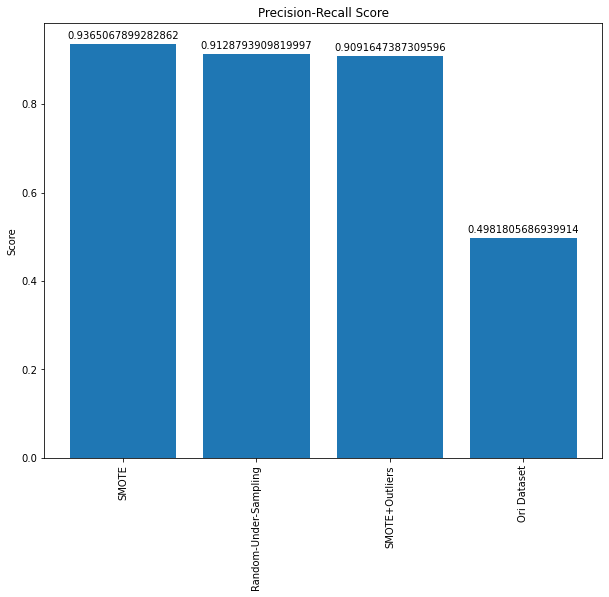

In [208]:
#Sort based on the values
precision_recall_score=dict(sorted(precision_recall_score.items(), key=lambda item: item[1], reverse=True))

x_plot = list(precision_recall_score.keys())
y_plot = list(precision_recall_score.values())

label = x_plot

fig, ax = plt.subplots()
rects1 = ax.bar(x_plot,y_plot)
ax.set_title('Precision-Recall Score')
ax.set_ylabel('Score')
ax.set_xticklabels(label, rotation = 'vertical')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)

fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

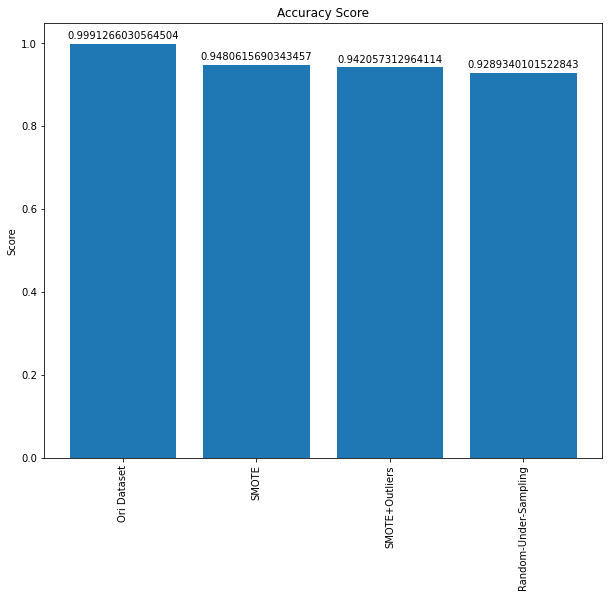

In [207]:
#Sort based on the values
accuracyscore=dict(sorted(accuracyscore.items(), key=lambda item: item[1], reverse=True))


x_plot = list(accuracyscore.keys())
y_plot = list(accuracyscore.values())

label = x_plot

fig, ax = plt.subplots()
rects1 = ax.bar(x_plot,y_plot)
ax.set_title('Accuracy Score')
ax.set_ylabel('Score')
ax.set_xticklabels(label, rotation = 'vertical')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)

fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

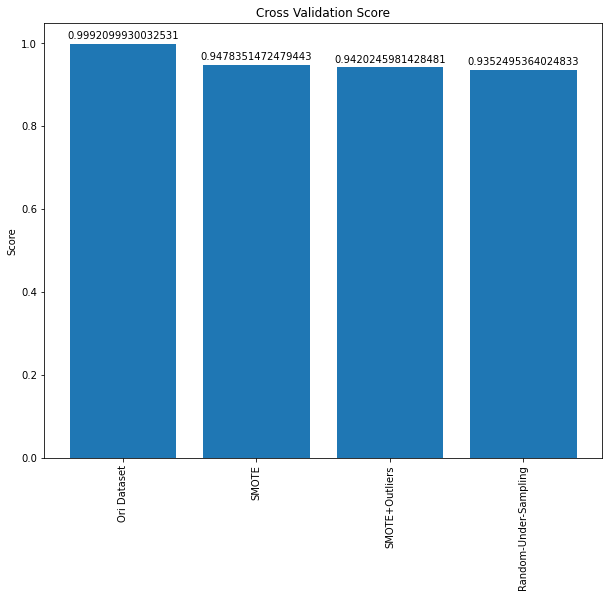

In [206]:
#Sort based on the values
crossval_score=dict(sorted(crossval_score.items(), key=lambda item: item[1], reverse=True))


x_plot = list(crossval_score.keys())
y_plot = list(crossval_score.values())

label = x_plot

fig, ax = plt.subplots()
rects1 = ax.bar(x_plot,y_plot)
ax.set_title('Cross Validation Score')
ax.set_ylabel('Score')
ax.set_xticklabels(label, rotation = 'vertical')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)

fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

In [160]:
class_report

{'Random-Under-Sampling': '              precision    recall  f1-score   support\n\n           0       0.90      0.96      0.93       393\n           1       0.96      0.89      0.93       395\n\n    accuracy                           0.93       788\n   macro avg       0.93      0.93      0.93       788\nweighted avg       0.93      0.93      0.93       788\n',
 'SMOTE': '              precision    recall  f1-score   support\n\n           0       0.92      0.98      0.95    227365\n           1       0.97      0.92      0.95    227539\n\n    accuracy                           0.95    454904\n   macro avg       0.95      0.95      0.95    454904\nweighted avg       0.95      0.95      0.95    454904\n',
 'SMOTE+Outliers': '              precision    recall  f1-score   support\n\n           0       0.93      0.97      0.95    209706\n           1       0.96      0.90      0.93    157122\n\n    accuracy                           0.94    366828\n   macro avg       0.95      0.94      0.94 

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_fscore_support

for i in range(len(datas)):
    #Split dataset
    X = (list(datas.values())[i]).drop('Class', axis=1)
    y = (list(datas.values())[i])['Class']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state = 42)

    # Turn the values into an array for feeding the classification algorithms.
    X_train = X_train.values
    X_test = X_test.values
    y_train = y_train.values
    y_test = y_test.values
    
    classifiers = {
    "LogisiticRegression": LogisticRegression()
    }
    
    #Fit the data into the model
    log_reg = LogisticRegression().fit(X_train, y_train)
    
    #Test the model to the test dataset and calculate the average precision-recall score
    y_score = log_reg.predict(X_test)
    average_precision = average_precision_score(y_test, y_score)
    precision_recall_score[list(datas.keys())[i]]=average_precision

    #Print out the classification report
    clas_report = classification_report(y_test, y_score)
    class_report[list(datas.keys())[i]]=clas_report

    #Print out the cross validation score
    training_score = cross_val_score(classifier, X_test, y_test, cv=5)
    crossval_score[list(datas.keys())[i]]=training_score.mean()
    
    acc_score = accuracy_score(y_test, y_score)
    accuracyscore[list(datas.keys())[i]]=acc_score
    
    
    f1=precision_recall_fscore_support(y_true, y_pred, average='binary')
    f1score[list(datas.keys())[i]]=f1
 
    rocauc=roc_auc_score(y, clf.decision_function(X_train))
    rocauc_score[list(datas.keys())[i]]=rocauc




In [212]:
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_fscore_support

f1={}
aucscore={}
recall={}
precision={}

for i in range(len(datas)):
    #Split dataset
    X = (list(datas.values())[i]).drop('Class', axis=1)
    y = (list(datas.values())[i])['Class']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state = 42)

    # Turn the values into an array for feeding the classification algorithms.
    X_train = X_train.values
    X_test = X_test.values
    y_train = y_train.values
    y_test = y_test.values
    
    #fit into a model
    model = LogisticRegression(solver='lbfgs')
    model.fit(X_train, y_train)

    # predict probabilities
    lr_probs = model.predict_proba(X_test)

    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]

    # predict class values
    yhat = model.predict(X_test)
    lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)

    # summarize scores
    recall[list(datas.keys())[i]]=lr_recall
    precision[list(datas.keys())[i]]=lr_precision
    
    f1[list(datas.keys())[i]]=f1_score(y_test, yhat)
    aucscore[list(datas.keys())[i]]=auc(lr_recall, lr_precision)

In [216]:
aucscore

{'Random-Under-Sampling': 0.9797764102231464,
 'SMOTE': 0.9907296511087148,
 'SMOTE+Outliers': 0.9860905880066863,
 'Ori Dataset': 0.7356859170627227}

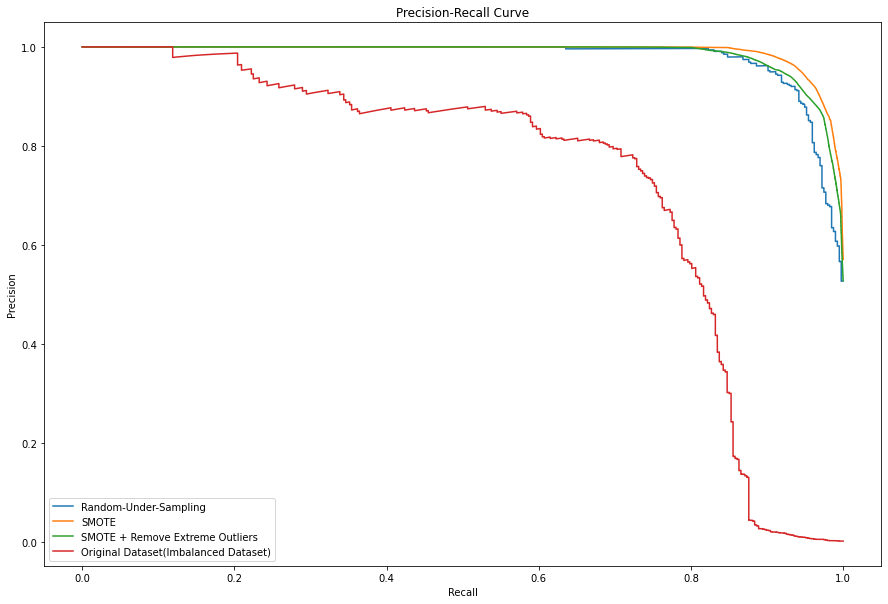

In [239]:
# plot the precision-recall curves 
plt.plot(list(recall.values())[0], list(precision.values())[0],  label=list(recall.keys())[0])
plt.plot(list(recall.values())[1], list(precision.values())[1],  label=list(recall.keys())[1])
plt.plot(list(recall.values())[2], list(precision.values())[2],  label='SMOTE + Remove Extreme Outliers')
plt.plot(list(recall.values())[3], list(precision.values())[3],  label='Original Dataset(Imbalanced Dataset)')

# axis labels
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')

# show the legend
plt.legend()

# show the plot
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.show()

In [222]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

auc2={}
fpr={}
tpr={}

for i in range(len(datas)):
    #Split dataset
    X = (list(datas.values())[i]).drop('Class', axis=1)
    y = (list(datas.values())[i])['Class']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state = 42)

    # Turn the values into an array for feeding the classification algorithms.
    X_train = X_train.values
    X_test = X_test.values
    y_train = y_train.values
    y_test = y_test.values
    
    #fit into a model
    model = LogisticRegression(solver='lbfgs')
    model.fit(X_train, y_train)

    # predict probabilities
    lr_probs = model.predict_proba(X_test)

    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]

    # calculate scores
    lr_auc = roc_auc_score(y_test, lr_probs)
    
    # calculate roc curves
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
    
    auc2[list(datas.keys())[i]]=lr_auc
    fpr[list(datas.keys())[i]]=lr_fpr
    tpr[list(datas.keys())[i]]=lr_tpr

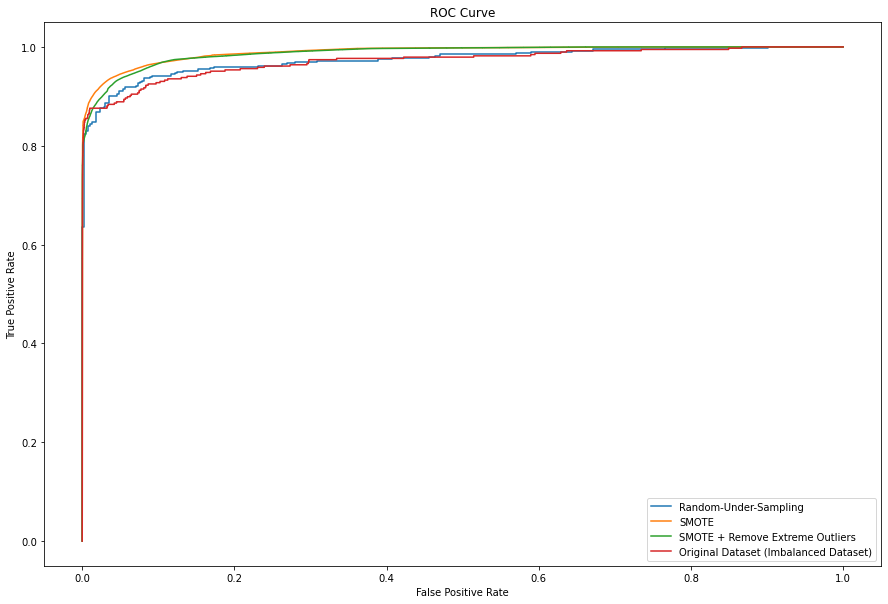

In [240]:
# plot the roc curve for the model
plt.plot(list(fpr.values())[0], list(tpr.values())[0],  label=list(tpr.keys())[0])
plt.plot(list(fpr.values())[1], list(tpr.values())[1],  label=list(tpr.keys())[1])
plt.plot(list(fpr.values())[2], list(tpr.values())[2],  label='SMOTE + Remove Extreme Outliers')
plt.plot(list(fpr.values())[3], list(tpr.values())[3],  label='Original Dataset (Imbalanced Dataset)')

# axis labels
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()
fig = plt.gcf()
fig.set_size_inches(15, 10)

# show the plot
plt.show()

In [209]:
#Buat curve precision-recall and roc-auc

In [ ]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]

# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

# predict probabilities
lr_probs = model.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

**ROC-AUC**

In [ ]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)

# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

In [ ]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

# Handle Imbalanced Dataset with SMOTE

SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

In [ ]:
from collections import Counter
from imblearn.combine import SMOTETomek

#Implementing the technique
smk = SMOTETomek(random_state=42)

# fit and apply the transform
X_smk, y_smk = smk.fit_resample(X_train, y_train)

# summarize class distribution
print(Counter(y))
print(Counter(y_smk))

In [ ]:
#Make a train set dataframe for SMOTE

train_smote = X_smk

train_smote['Class']=y_smk

#Reset the index
train_smote['index']=[i for i in range(len(train_smote))]
train_smote = train_smote.set_index('index')

X_smk = X_smk.drop(['index','Class'],axis=1)

In [ ]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,10))
fig.suptitle('Feature Correlation')

#Imbalanced Dataset
sns.heatmap(train_set.corr(),ax=axes[0])
axes[0].set_title('With Imbalanced Dataset')

#Data after SMOTE
sns.heatmap(train_smote.corr(),ax=axes[1])
axes[1].set_title('After SMOTE')

The correlation looks all over the place so I will use t-SNE to cluster the feature so it looks more cleaned up

# Clusterring

In [ ]:
# T-SNE Implementation
from sklearn.manifold import TSNE
X_reduced_tsne = TSNE(n_components=3).fit_transform(X_smk)

In [ ]:
# t-SNE scatter plot
plt.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y_smk == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
plt.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y_smk == 1), cmap='coolwarm', label='Fraud', linewidths=2)
plt.title('t-SNE', fontsize=14)

plt.grid(True)

In [ ]:
from sklearn.decomposition import PCA
X_reduced_pca = PCA(n_components=30).fit_transform(X_smk)

In [ ]:
# PCA scatter plot
plt.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y_smk == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
plt.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y_smk == 1), cmap='coolwarm', label='Fraud', linewidths=2)
plt.title('PCA', fontsize=14)

plt.grid(True)

In [ ]:
from sklearn.decomposition import TruncatedSVD
X_reduced_svd = TruncatedSVD(n_components=29).fit_transform(X_smk)

In [ ]:
# TruncatedSVD scatter plot
plt.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y_smk == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
plt.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y_smk == 1), cmap='coolwarm', label='Fraud', linewidths=2)
plt.title('Truncated SVD', fontsize=14)

plt.grid(True)

In [ ]:
plt.subplots(figsize=(8,8))
sns.heatmap(X_reduced_tsne.corr())
plt.title('Correlation after SMOTE and t-SNE')

**Determine the Positive and Negative Correlation**

**Positive Correlation:**
    
**Negative Correlation:**

I will be handling the imbalanced dataset with 3 method and then I will compare it in the end.
The method that I will be using is :
    1. Random Under-Sampling Technique
    2. Random Over-Sampling Technique
    3. SMOTE(Synthetic Minority Oversampling Technique)

In [ ]:
#Define the dependent and independent dataset
X = dataset.drop('Class',axis=1)
X = np.array(X)
y = dataset['Class']

In [ ]:
from collections import Counter

print(Counter(y))

counter = Counter(y)

for label, _ in counter.items():
	row_ix = where(y == label)[0]
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [ ]:
dataset.shape

**Random Under-Sampling Technique**

I will be using NearMiss-3 where it select the closest given number of majority class example for each example in the minority class

In [ ]:
# import the library
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
X_us, y_us = undersample.fit_resample(X, y)

# summarize class distribution
print(Counter(y))
print(Counter(y_us))

In [ ]:
# T-SNE Implementation
from sklearn.manifold import TSNE
X_reduced_tsne_us = TSNE(n_components=2).fit_transform(X_us)

In [ ]:
# t-SNE scatter plot
plt.scatter(X_reduced_tsne_us[:,0], X_reduced_tsne_us[:,1], c=(y_us == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
plt.scatter(X_reduced_tsne_us[:,0], X_reduced_tsne_us[:,1], c=(y_us == 1), cmap='coolwarm', label='Fraud', linewidths=2)
plt.title('t-SNE', fontsize=14)

plt.grid(True)

In [ ]:
counter = Counter(y_us)
X_us = np.array(X_us)

for label, _ in counter.items():
	row_ix = where(y_us == label)[0]
	plt.scatter(X_us[row_ix, 0], X_us[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [ ]:
# import the library
from collections import Counter
from imblearn.under_sampling import NearMiss

# define undersample strategy
undersample = NearMiss(version=3)

# fit and apply the transform
X_usn, y_usn = undersample.fit_resample(X, y)

# summarize class distribution
print(Counter(y))
print(Counter(y_usn))

In [ ]:
for label, _ in counter.items():
    row_ix = where(y_us == label)[0]
    plt.scatter(X_us[row_ix, 0],X_us[row_ix, 1])

In [ ]:
counter = Counter(y_usn)
X_usn = np.array(X_usn)

for label, _ in counter.items():
	row_ix = where(y_us == label)[0]
	plt.scatter(X_us[row_ix, 0], X_us[row_ix, 1], label=str(label))
plt.legend()
plt.show()

**Random Over-Sampling Technique**

In [ ]:
#import the library
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

#define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority') #set to minority to automatically balance the minority class with majority class

# fit and apply the transform
X_over, y_over = oversample.fit_sample(X, y)

# summarize class distribution
print(Counter(y))
print(Counter(y_over))

In [ ]:
counter = Counter(y_over)
X_over = np.array(X_over)

for label, _ in counter.items():
	row_ix = where(y_over == label)[0]
	plt.scatter(X_over[row_ix, 0], X_over[row_ix, 1], label=str(label))
plt.legend()
plt.show()

We can see that we're succed in the over-sampling technique

**SMOTE(Synthetic Minority Oversampling Technique)**

In [ ]:
counter = Counter(y_smk)
X_smk = np.array(X_smk)

for label, _ in counter.items():
	row_ix = where(y_smk == label)[0]
	plt.scatter(X_smk[row_ix, 0], X_smk[row_ix, 1], label=str(label))
plt.legend()
plt.show()

For this I will use SMOTE

# See Corelation between each Column

In [ ]:
lab = [i for i in dataset.columns if i!='Class']

X_smk = pd.DataFrame(X_smk, columns=lab)
y_smk = pd.DataFrame(y_smk, columns=['Class'])

data_fin = pd.concat([X_smk,y_smk],axis=1, join='outer', ignore_index = False)

In [ ]:
plt.subplots(figsize=(8,8))
sns.heatmap(dataset.corr())
plt.title('Correlation with Imbalanced Dataset')

In [ ]:
plt.subplots(figsize=(8,8))
sns.heatmap(data_fin.corr())
plt.title('Correlation after SMOTE')

# Outliers

I want to see the outliers in each column and see the possible overlap between each class in different columns

In [ ]:
col = [i for i in data_fin.columns if i!='Class']
for i in col:
    sns.boxplot(x="Class", y=i, data=data_fin)
    plt.title(i)
    plt.show()

We can see that for **'Time',  'V5',  'V6',  'V8',  'V13',  'V15', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'** we can't differentiate each class

But for **'V1', 'V2', 'V3', 'V4', 'V7', 'V9', 'V11', 'V16', 'V17', 'V18', 'V19'** we can see slight difference although there's some overlap

And for **'V10', 'V12', 'V14'** we can differentiate each class.

In [ ]:
for i in col:
    sns.distplot(data_fin[i])
    plt.title(i)
    plt.show()